# K Nearest Neighbour



Below mentioned are the steps to be followed:

1. Load the data
2. Data Preparation - Normalisation or Rescaling, train-test Split
3. Training the Model
4. Prediction
5. Evaluation



## Loading the Data

In [1]:
import pandas as pd

df = pd.read_csv('data/Iris.csv')

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data Preparation - Standardization

In [3]:
y = df['Species']

X = df.drop("Species",axis=1)

In [4]:
print(X.shape)

print(y.shape)

(150, 4)
(150,)


## Data Preparation - Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Data Preprocessing on Training Data

In [12]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),
                                  columns = X_train.columns,
                                  index = X_train.index)

print(X_train_transformed.shape)

(112, 4)


## Training

- n_neighbors helps in deciding the number of nearest neighbors to look at
- p is a Hyperparameter of KNN for `metric=minkowski`
- p = 1 refers to Manhattan Distance
- p = 2 refers to Euclidean Distance
- p > 3 is Minkowski Distance Metric


#### Other Pairwise Distance Metrics Allowed

| metric | Function |
| :---: | :---: |
| `'cityblock'` | metrics.pairwise.manhattan_distances |
| `'cosine'` | metrics.pairwise.cosine_distances |
| `'euclidean'` | metrics.pairwise.euclidean_distances |
| `'haversine'` | metrics.pairwise.haversine_distances |
| `'l1'` | metrics.pairwise.manhattan_distances |
| `'l2'` | metrics.pairwise.euclidean_distances |
| `'manhattan'` | metrics.pairwise.manhattan_distances |
| `'nan_euclidean'` | metrics.pairwise.nan_euclidean_distances |

In [13]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [14]:
# Classes known to classifier
classifier.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
# Knowing the distance metric used
classifier.effective_metric_

'euclidean'

In [16]:
# Number of features seen by algo during training
classifier.n_features_in_

4

In [17]:
# Names of features seen during training
classifier.feature_names_in_

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
      dtype=object)

## Predictions

In [18]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test),
                                 columns = X_test.columns,
                                 index = X_test.index)

print(X_test_transformed.shape)

(38, 4)


In [19]:
y_test_pred = classifier.predict(X_test_transformed)

C:\Users\Kanav\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Measuring Performance

In [20]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

## Training with Cosine Distance Metric

In [39]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(metric='cosine')

classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier(metric='cosine')

In [40]:
# Knowing the distance metric used
classifier.effective_metric_

'cosine'

In [41]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test),
                                 columns = X_test.columns,
                                 index = X_test.index)

print(X_test_transformed.shape)

(38, 2)


In [42]:
y_test_pred = classifier.predict(X_test_transformed)

C:\Users\Kanav\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
# calculate accuracy of class predictions
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.7894736842105263

# Let's now see how to do it like a BOSS!

Have a look at the steps that are followed:
1. Load the data
2. Analyse the data
3. Data Preparation
4. Training
5. Predictions
6. Evaluation

## Load the Data

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('data/Iris.csv')

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

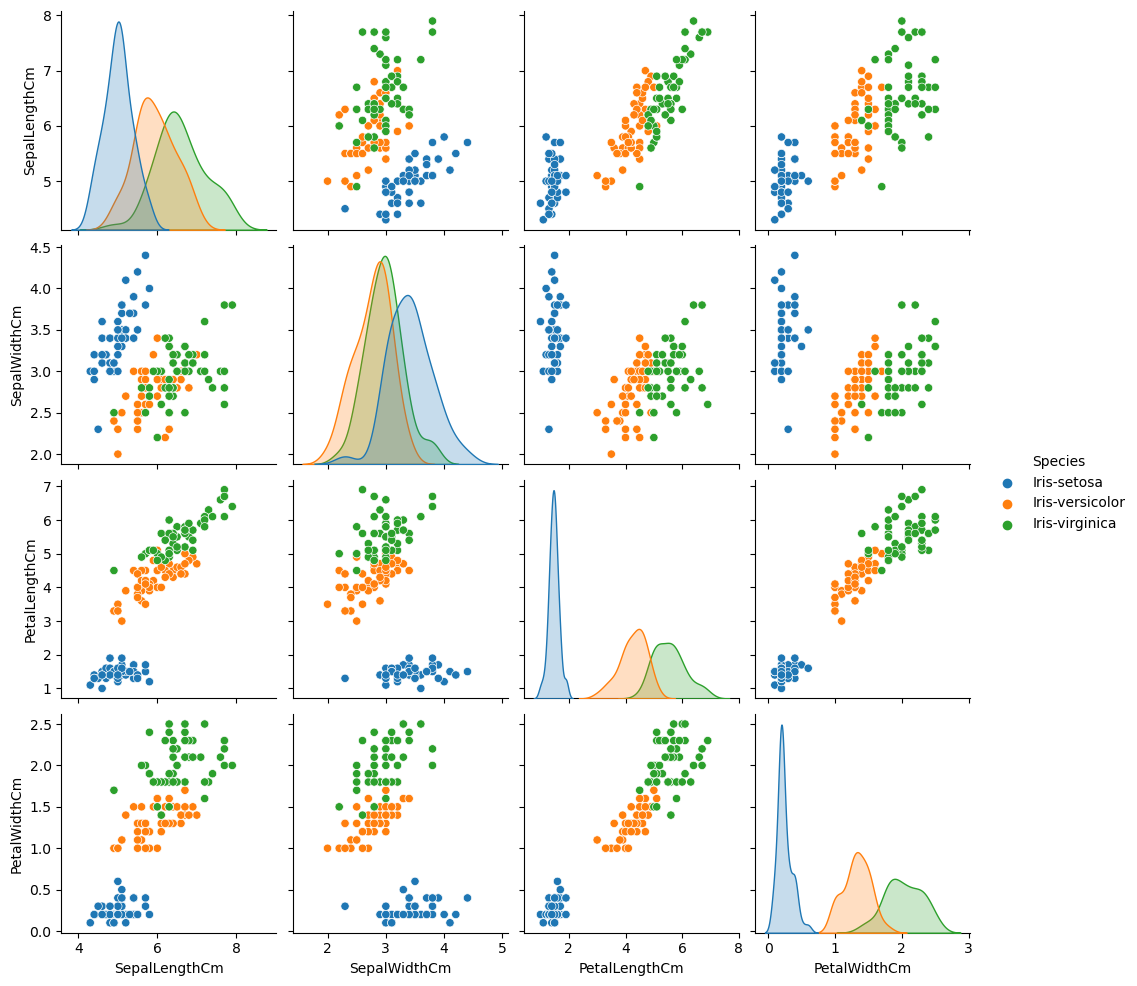

In [24]:
sns.pairplot(df, hue='Species')

<b>Observation</b>

It looks like I don't have to consider all 4 variables to build my model. I can consider either one of the following pair:
1. PetalLength and SepalLength
2. PetalLength and SepalWidth
3. PetalLength and PetalWidth
4. PetalWidth and SepalLength


## Data Preparation - Standardization

In [25]:
y = df['Species']

X = df.loc[:,['PetalWidthCm', 'SepalLengthCm']]

In [26]:
print(X.shape)

print(y.shape)

(150, 2)
(150,)


## Data Preparation - Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Data Preprocessing on Training Data

In [28]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),
                                  columns = X_train.columns,
                                  index = X_train.index)

print(X_train_transformed.shape)

(112, 2)


## Training

In [29]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

## Predictions

In [30]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test),
                                 columns = X_test.columns,
                                 index = X_test.index)

print(X_test_transformed.shape)

(38, 2)


In [31]:
y_test_pred = classifier.predict(X_test_transformed)

C:\Users\Kanav\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Measuring Performance

In [32]:
# calculate accuracy of class predictions
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

In [33]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  1,  8]], dtype=int64)

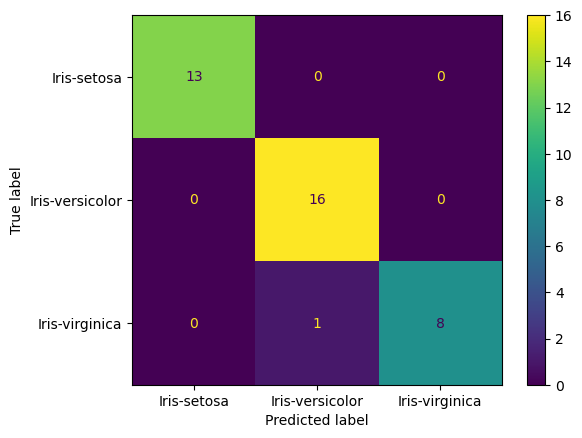

In [38]:
cm = metrics.confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)

fig = metrics.ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)

plt.show()

In [35]:
print(metrics.classification_report(y_test, y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        38
      macro avg       0.98      0.96      0.97        38
   weighted avg       0.98      0.97      0.97        38

